# Library Imports

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from pymc import math as pm_math
from scipy.stats import halfnorm, skewnorm

# Model Specification

# Model Specification
## Simulated Data
$$ X \sim N(1,1) $$
$$ U \sim HN(0, \sigma_u^2) $$
$$ Y \sim SN(\xi, \sigma_v^2, \lambda)$$
$$ \xi = \alpha + \beta X - U $$
$$ \alpha = 5, \beta = 2 $$
## Priors
$$ \alpha \sim N(\mu_\alpha, \sigma_\alpha^2) $$
$$ \beta \sim N(\mu_\beta, \sigma_\beta^2) $$
$$ \sigma_v^2 \sim IG(\alpha_v, \beta_v) $$
$$ \sigma_u^2 \sim IG(\alpha_u, \beta_u) $$
$$ \lambda \sim TN(\mu_\lambda, \sigma_\lambda^2; a, b)$$


# Simulate Data: $$ \lambda = -0.5 $$

# Trace container: Skew

In [48]:
trace_skew = []

# Trace container: Normal

In [57]:
trace_norm = []

# List of sample sizes

In [3]:
sample_size = [50, 100, 200, 500]

# Model Generation: Skew Normal

In [67]:
def skew_norm(sample_size):
    np.random.seed(123)

    # Parameters
    n = sample_size
    alpha = 5
    beta = 2
    sigma_u = 1
    sigma_v = 1.5
    lambda_skew = -0.5

    # Simulate input X
    X = np.random.normal(1, 1, n)

    # Inefficiency term U ~ HalfNormal(0, sigma_u)
    U = halfnorm(scale=sigma_u).rvs(n)

    # Location ξ = α + βX − U
    xi = alpha + beta * X - U

    # Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
    Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

    # Put in DataFrame for convenience
    data = pd.DataFrame({'X': X, 'Y': Y})

    # Generate Model
    with pm.Model() as pooled:
        # Priors for parameters
        alpha_ = pm.Normal('alpha', mu=5, sigma=5)
        beta_ = pm.Normal('beta', mu=2, sigma=2)
        sigma_u = pm.InverseGamma('sigma_u', alpha=4, beta=3)
        sigma_v = pm.InverseGamma('sigma_v', alpha=2, beta=3)
        lam = pm.TruncatedNormal('lam', mu=-0.5, sigma=1, lower=-4, upper=0)

        # Latent inefficiency U ~ HalfNormal(0, sigma_u)
        U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

        # Linear predictor with inefficiency
        mu = alpha_ + beta_ * data['X'] - U

        # Skew-Normal likelihood
        Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

        # MCMC Sampling
        trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True, compute_covergence_checks=True, idata_kwargs={"log_likelihood": True})
        return trace

# Model Generation: Normal

In [69]:
def norm(sample_size):
    np.random.seed(123)

    # Parameters
    n = sample_size
    alpha = 5
    beta = 2
    sigma_u = 1
    sigma_v = 1.5
    lambda_skew = -0.5

    # Simulate input X
    X = np.random.normal(1, 1, n)

    # Inefficiency term U ~ HalfNormal(0, sigma_u)
    U = halfnorm(scale=sigma_u).rvs(n)

    # Location ξ = α + βX − U
    xi = alpha + beta * X - U

    # Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
    Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

    # Put in DataFrame for convenience
    data = pd.DataFrame({'X': X, 'Y': Y})

    # Generate Model
    with pm.Model() as pooled:
        # Priors for parameters
        alpha_ = pm.Normal('alpha', mu=5, sigma=5)
        beta_ = pm.Normal('beta', mu=2, sigma=2)
        sigma_u = pm.InverseGamma('sigma_u', alpha=4, beta=3)
        sigma_v = pm.InverseGamma('sigma_v', alpha=2, beta=3)
        # lam = pm.TruncatedNormal('lam', mu=-0.5, sigma=1, lower=-4, upper=0)

        # Latent inefficiency U ~ HalfNormal(0, sigma_u)
        U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

        # Linear predictor with inefficiency
        mu = alpha_ + beta_ * data['X'] - U

        # Normal likelihood
        Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma_v, observed=data['Y'])

        # MCMC Sampling
        trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True, compute_covergence_checks=True, idata_kwargs={"log_likelihood": True})
        return trace

# Trace Generation: Skew

In [70]:
trace_skew.append(skew_norm(50))
trace_skew.append(skew_norm(100))
trace_skew.append(skew_norm(200))
trace_skew.append(skew_norm(500))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 18 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 22 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 39 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 68 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


# Trace Generation: Normal

In [71]:
trace_norm.append(norm(50))
trace_norm.append(norm(100))
trace_norm.append(norm(200))
trace_norm.append(norm(500))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 15 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 16 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 28 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 37 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


# Posterior Summaries: Skew

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.37  0.55    3.40     5.43       0.01     0.00   5947.27  10300.18   
beta     2.32  0.18    1.98     2.67       0.00     0.00  22463.70  18220.95   
sigma_u  0.83  0.35    0.28     1.49       0.01     0.00   2373.71   4744.68   
sigma_v  1.62  0.27    1.16     2.16       0.00     0.00   8815.47  10221.76   
lam     -0.66  0.46   -1.46    -0.00       0.00     0.00  11235.90  10366.58   
U[0]     0.57  0.48    0.00     1.45       0.01     0.00   8293.73  10354.39   
U[1]     0.83  0.70    0.00     2.12       0.01     0.01   4902.73   9167.14   
U[2]     1.02  0.84    0.00     2.59       0.01     0.01   3878.04   7778.36   
U[3]     1.08  0.89    0.00     2.73       0.01     0.01   3856.41   7110.94   
U[4]     0.37  0.33    0.00     0.96       0.00     0.00  12997.56  10120.30   
U[5]     0.61  0.52    0.00     1.55       0.01     0.01   7185.95   8724.95   
U[6]     0.43  0.39    0.00     1.13       0.00     0.00  10639.39  10337.17   
U[7]     0.70  0.59    0.00     1.77       0.01     0.01   5839.47   8722.97   
U[8]     0.50  0.44    0.00     1.30       0.00     0.00  11286.17  10238.53   
U[9]     0.65  0.54    0.00     1.64       0.01     0.01   6852.63  10334.29   
U[10]    0.54  0.47    0.00     1.39       0.00     0.00   8768.50  10115.97   
U[11]    0.66  0.56    0.00     1.69       0.01     0.01   6487.65   9992.80   
U[12]    0.61  0.52    0.00     1.56       0.01     0.00   6574.72   8033.40   
U[13]    0.52  0.44    0.00     1.33       0.00     0.00   8234.77   9878.31   
U[14]    0.57  0.49    0.00     1.45       0.01     0.00   8509.30   9640.56   
U[15]    0.69  0.58    0.00     1.74       0.01     0.01   6498.99  10188.71   
U[16]    0.94  0.78    0.00     2.36       0.01     0.01   4256.27   8876.65   
U[17]    0.44  0.39    0.00     1.14       0.00     0.00  13026.02  10155.28   
U[18]    0.79  0.66    0.00     1.99       0.01     0.01   5338.33   9028.55   
U[19]    0.59  0.51    0.00     1.53       0.01     0.01   6960.66   8444.53   
U[20]    0.43  0.37    0.00     1.11       0.00     0.00  12551.42  11051.41   
U[21]    0.63  0.53    0.00     1.58       0.01     0.01   6994.85  10040.97   
U[22]    0.67  0.57    0.00     1.73       0.01     0.01   6978.88  11080.87   
U[23]    0.67  0.56    0.00     1.70       0.01     0.01   6804.19   9477.24   
U[24]    0.72  0.60    0.00     1.82       0.01     0.01   5886.17  10954.01   
U[25]    0.82  0.69    0.00     2.07       0.01     0.01   5373.26   9504.42   
U[26]    0.55  0.47    0.00     1.40       0.00     0.00   7596.00  10306.78   
U[27]    0.54  0.47    0.00     1.39       0.00     0.00   7983.57   8955.75   
U[28]    0.63  0.54    0.00     1.61       0.01     0.01   7215.19   9965.99   
U[29]    0.67  0.56    0.00     1.69       0.01     0.01   6471.16   9485.60   
U[30]    0.68  0.57    0.00     1.74       0.01     0.01   6489.29   9607.37   
U[31]    0.75  0.64    0.00     1.94       0.01     0.01   5696.97   9814.63   
U[32]    0.90  0.75    0.00     2.29       0.01     0.01   4286.28   8192.23   
U[33]    0.60  0.51    0.00     1.53       0.01     0.01   8164.57  11176.89   
U[34]    0.66  0.56    0.00     1.70       0.01     0.01   6621.40   9991.02   
U[35]    1.10  0.91    0.00     2.81       0.02     0.01   3673.15   7331.89   
U[36]    0.50  0.43    0.00     1.28       0.00     0.00   9477.72   9402.18   
U[37]    0.98  0.81    0.00     2.49       0.01     0.01   4004.97   8362.26   
U[38]    0.87  0.73    0.00     2.22       0.01     0.01   4305.95   8335.45   
U[39]    0.57  0.48    0.00     1.44       0.01     0.00   7320.03   8550.27   
U[40]    0.64  0.55    0.00     1.64       0.01     0.01   6908.61   9585.32   
U[41]    0.55  0.47    0.00     1.41       0.00     0.00   8037.45   9456.92   
U[42]    0.53  0.46    0.00     1.36       0.00     0.00   8749.26  10300.56   
U[43]    0.65  0.55    0.00     1.67       0.01     0.01   6795.87   9952.26   
U[44]    

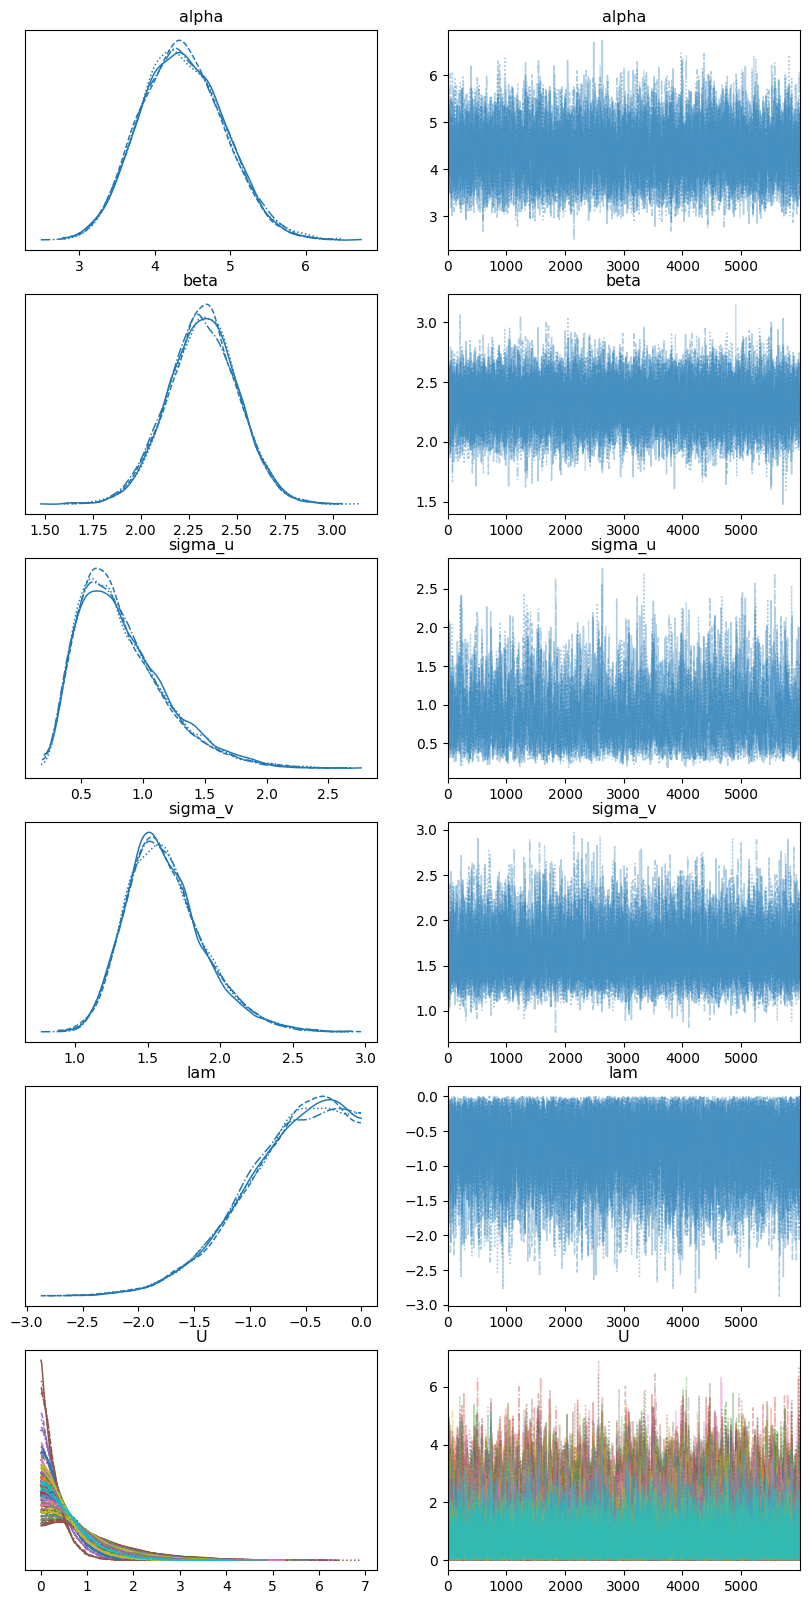

In [72]:
az.plot_trace(trace_skew[0], figsize=(10,20))
az.summary(trace_skew[0], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.57  0.46    4.69     6.38       0.01     0.00   2005.22   5682.07   
beta     1.91  0.12    1.67     2.13       0.00     0.00  11120.84  16444.64   
sigma_u  0.90  0.39    0.29     1.63       0.02     0.01    599.62   1046.50   
sigma_v  1.47  0.26    0.99     1.98       0.01     0.00   1349.85   1486.56   
lam     -0.90  0.59   -1.92    -0.00       0.01     0.00   7579.83   9443.48   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.42  1.13    0.00     3.56       0.04     0.03    872.51   1430.38   
U[96]    0.90  0.72    0.00     2.23       0.02     0.01   1472.22   3204.60   
U[97]    0.56  0.46    0.00     1.41       0.01     0.00   3573.15   7006.45   
U[98]    0.63  0.52    0.00     1.59       0.01     0.01   2538.21   5412.70   
U[99]    0.61  0.49    0.00     1.52       0.01     0.01   3140.81   7399.24   

         r_hat  
alpha      1.0  
beta       1.0  
sigma_u    1.0  
sigma_v    1.0  
lam        1.0  
...        ...  
U[95]      1.0  
U[96]      1.0  
U[97]      1.0  
U[98]      1.0  
U[99]      1.0  

[105 rows x 9 columns]

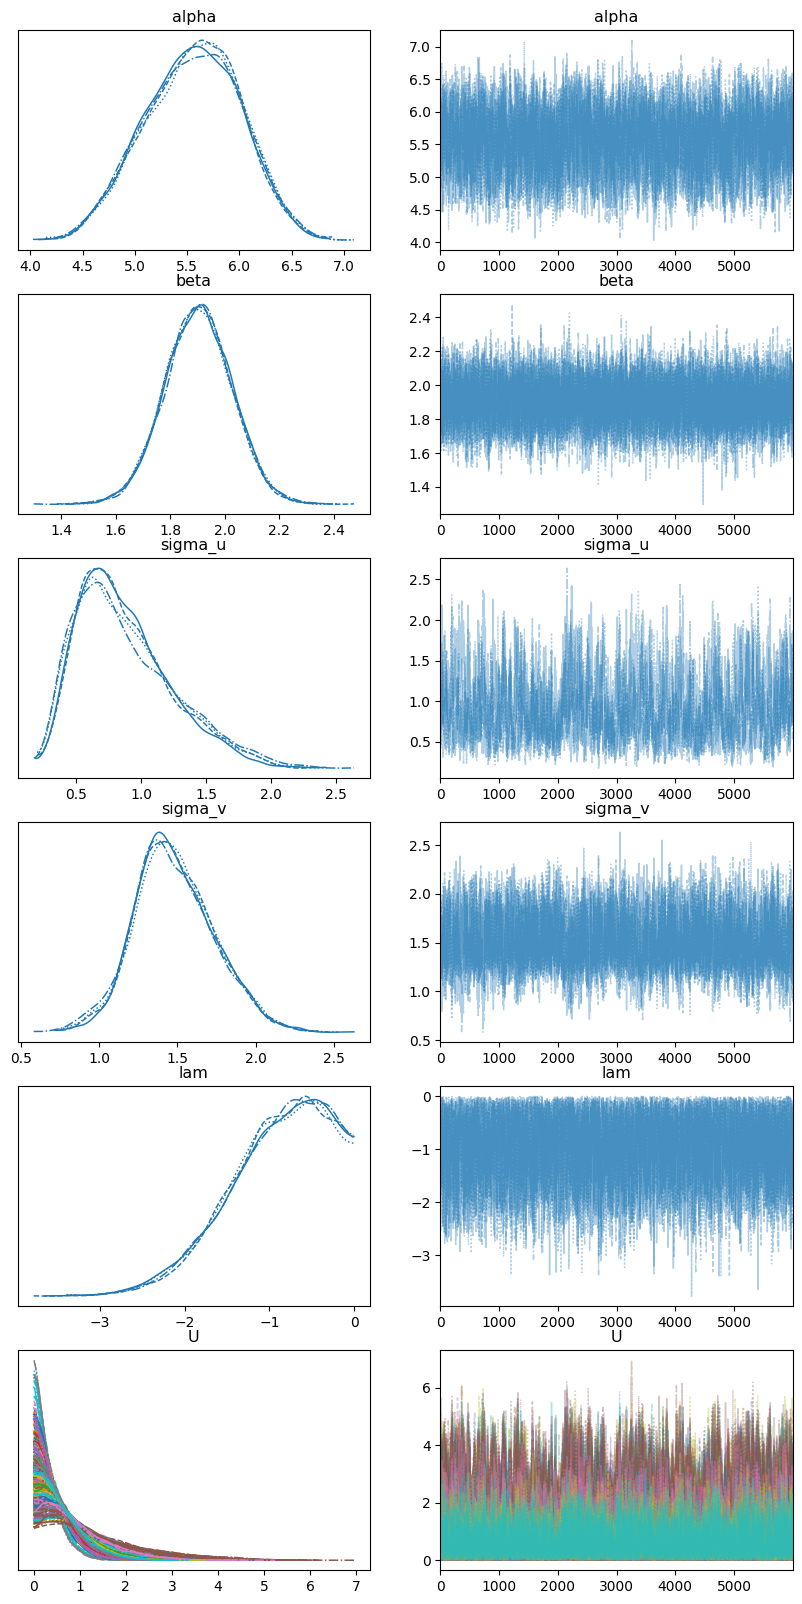

In [73]:
az.plot_trace(trace_skew[1], figsize=(10,20))
az.summary(trace[1], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.25  0.44    4.42     6.06       0.01     0.00   1813.33   3421.76   
beta     2.07  0.10    1.88     2.26       0.00     0.00  16304.24  16194.88   
sigma_u  0.93  0.40    0.31     1.68       0.02     0.01    377.57    926.53   
sigma_v  1.67  0.27    1.16     2.14       0.01     0.00    706.76   1070.35   
lam     -1.04  0.55   -1.91    -0.00       0.01     0.00   2962.77   4695.64   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[195]   0.74  0.61    0.00     1.86       0.02     0.01   1417.78   3361.51   
U[196]   0.82  0.66    0.00     2.05       0.02     0.01   1317.73   2927.71   
U[197]   0.45  0.39    0.00     1.16       0.01     0.00   5316.06   8400.76   
U[198]   0.74  0.61    0.00     1.86       0.02     0.01   1318.05   3462.02   
U[199]   0.67  0.55    0.00     1.70       0.01     0.01   1947.44   4845.31   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
lam       1.00  
...        ...  
U[195]    1.00  
U[196]    1.00  
U[197]    1.00  
U[198]    1.00  
U[199]    1.00  

[205 rows x 9 columns]

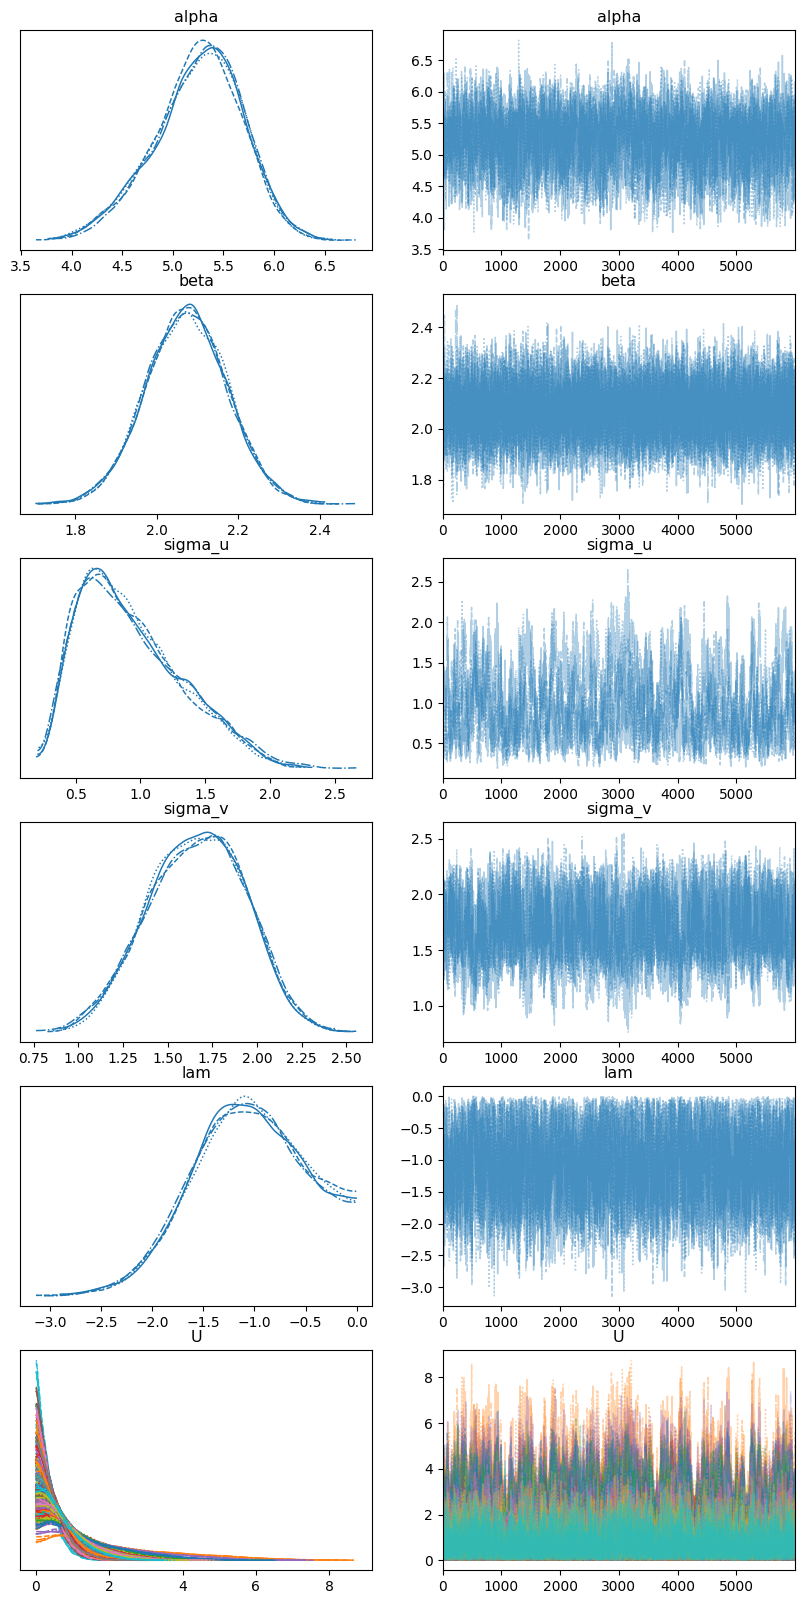

In [74]:
az.plot_trace(trace[2], figsize=(10,20))
az.summary(trace[2], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.02  0.35    4.37     5.66       0.01     0.00   1860.81   4782.54   
beta     1.92  0.07    1.79     2.04       0.00     0.00  40331.61  18646.71   
sigma_u  0.76  0.26    0.32     1.25       0.01     0.01    386.31    934.46   
sigma_v  1.51  0.14    1.26     1.79       0.00     0.00   1322.98   2024.02   
lam     -0.52  0.33   -1.07    -0.00       0.00     0.00  12996.27  13874.16   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[495]   0.44  0.37    0.00     1.11       0.01     0.00   5259.74  10040.27   
U[496]   0.52  0.43    0.00     1.29       0.01     0.01   4244.52   8930.96   
U[497]   0.51  0.42    0.00     1.27       0.01     0.00   3881.09   8962.27   
U[498]   0.80  0.63    0.00     1.95       0.02     0.01   1425.10   3834.53   
U[499]   0.72  0.57    0.00     1.75       0.01     0.01   1801.27   4563.68   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
lam       1.00  
...        ...  
U[495]    1.00  
U[496]    1.00  
U[497]    1.00  
U[498]    1.00  
U[499]    1.00  

[505 rows x 9 columns]

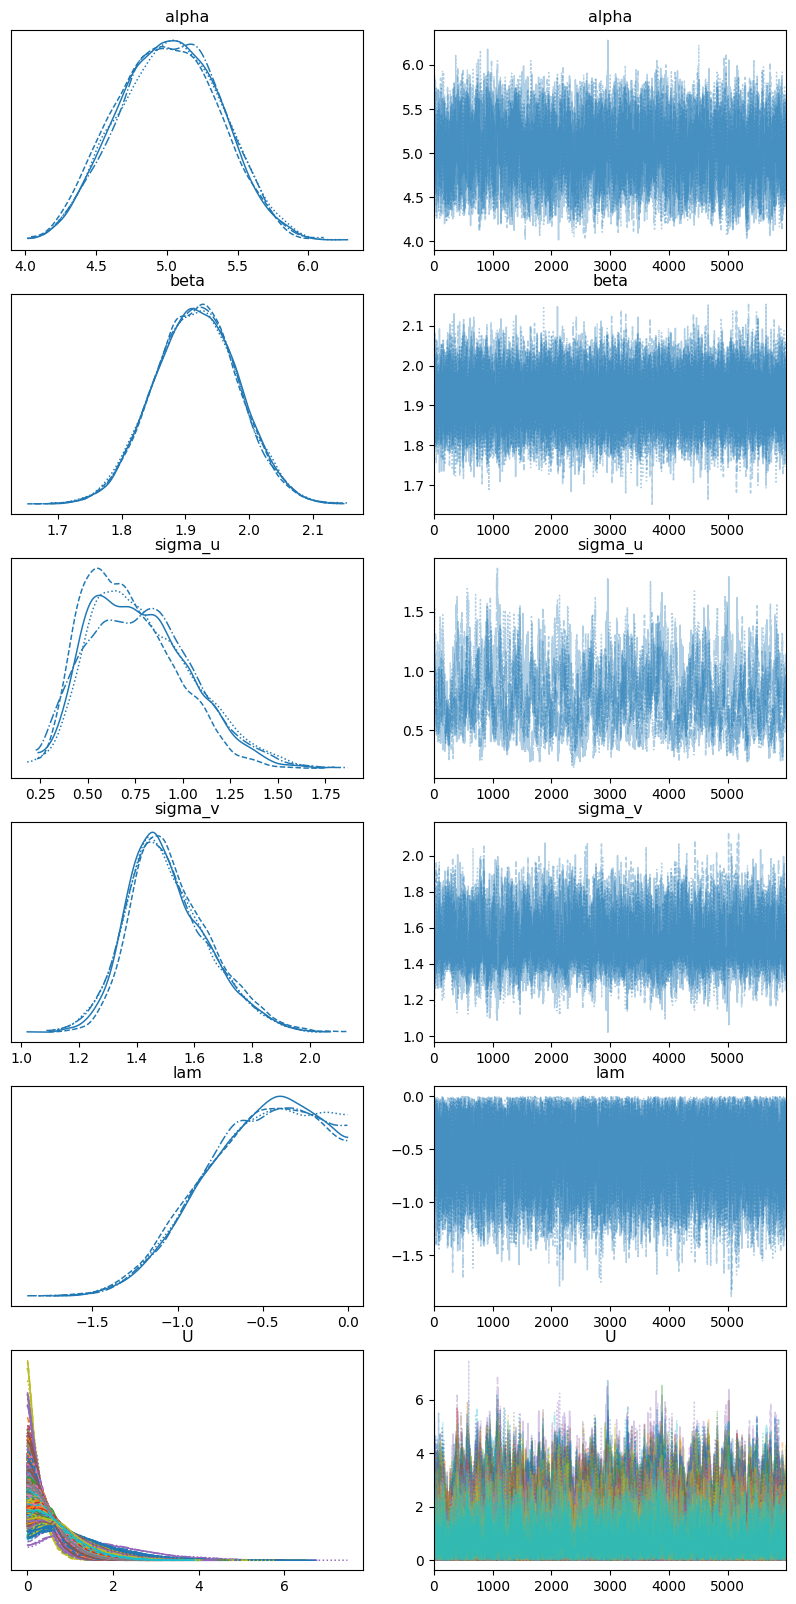

In [75]:
az.plot_trace(trace[3], figsize=(10,20))
az.summary(trace[3], round_to=2)

# Posterior Summaries: Normal

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    3.72  0.40    2.99     4.48       0.01     0.00   3124.65   5508.14   
beta     2.33  0.18    1.99     2.67       0.00     0.00  21038.44  17002.42   
sigma_u  0.83  0.36    0.27     1.50       0.01     0.00   2117.08   4637.72   
sigma_v  1.43  0.18    1.09     1.77       0.00     0.00   7099.35   8039.42   
U[0]     0.57  0.49    0.00     1.47       0.01     0.01   7423.04   9691.82   
U[1]     0.84  0.70    0.00     2.12       0.01     0.01   3889.06   8185.19   
U[2]     1.04  0.86    0.00     2.63       0.01     0.01   3569.36   7019.01   
U[3]     1.11  0.91    0.00     2.83       0.02     0.01   3303.57   6643.49   
U[4]     0.38  0.33    0.00     0.97       0.00     0.00  13322.83   9754.52   
U[5]     0.60  0.52    0.00     1.56       0.01     0.01   7206.77  11046.07   
U[6]     0.43  0.38    0.00     1.12       0.00     0.00  12880.23  11338.47   
U[7]     0.70  0.59    0.00     1.80       0.01     0.01   5046.18   8954.42   
U[8]     0.50  0.43    0.00     1.29       0.00     0.00   9594.26  10876.64   
U[9]     0.63  0.54    0.00     1.61       0.01     0.01   6000.11   8979.50   
U[10]    0.54  0.48    0.00     1.41       0.00     0.00   8193.50  10232.89   
U[11]    0.66  0.56    0.00     1.67       0.01     0.01   6121.84  10933.83   
U[12]    0.62  0.53    0.00     1.58       0.01     0.01   6528.52   9232.84   
U[13]    0.52  0.44    0.00     1.32       0.00     0.00   7465.98   8850.64   
U[14]    0.57  0.49    0.00     1.45       0.01     0.00   8102.00  10824.76   
U[15]    0.68  0.59    0.00     1.74       0.01     0.01   5881.42   9444.57   
U[16]    0.95  0.78    0.00     2.42       0.01     0.01   3928.28   7510.55   
U[17]    0.45  0.40    0.00     1.17       0.00     0.00  11846.92  11131.34   
U[18]    0.78  0.65    0.00     1.98       0.01     0.01   4617.37   9421.57   
U[19]    0.59  0.50    0.00     1.51       0.01     0.01   7325.38  10616.88   
U[20]    0.43  0.38    0.00     1.12       0.00     0.00  13129.95  11497.53   
U[21]    0.63  0.54    0.00     1.61       0.01     0.01   6715.99  10649.59   
U[22]    0.67  0.57    0.00     1.70       0.01     0.01   5937.18   9630.77   
U[23]    0.66  0.57    0.00     1.69       0.01     0.01   6002.38   9483.24   
U[24]    0.71  0.60    0.00     1.84       0.01     0.01   4673.86   6809.62   
U[25]    0.82  0.69    0.00     2.08       0.01     0.01   4721.34   8952.56   
U[26]    0.55  0.47    0.00     1.40       0.00     0.00   8766.77  10155.68   
U[27]    0.54  0.47    0.00     1.40       0.00     0.00   8728.41  11671.44   
U[28]    0.63  0.54    0.00     1.61       0.01     0.01   6629.94  10417.32   
U[29]    0.66  0.56    0.00     1.71       0.01     0.01   5880.62   9790.94   
U[30]    0.66  0.57    0.00     1.70       0.01     0.01   5967.88   9004.53   
U[31]    0.74  0.63    0.00     1.90       0.01     0.01   4693.12   9086.86   
U[32]    0.90  0.75    0.00     2.31       0.01     0.01   3536.87   7660.34   
U[33]    0.59  0.50    0.00     1.50       0.01     0.00   7283.12   8740.51   
U[34]    0.65  0.56    0.00     1.68       0.01     0.01   5825.40   8462.49   
U[35]    1.13  0.92    0.00     2.86       0.02     0.01   3292.72   6918.72   
U[36]    0.50  0.43    0.00     1.28       0.00     0.00   9308.57  10788.96   
U[37]    0.99  0.81    0.00     2.50       0.01     0.01   3606.76   7676.21   
U[38]    0.87  0.73    0.00     2.21       0.01     0.01   3983.82   8096.19   
U[39]    0.56  0.48    0.00     1.43       0.01     0.00   7389.05   9952.20   
U[40]    0.64  0.54    0.00     1.62       0.01     0.01   6003.66   9295.36   
U[41]    0.55  0.48    0.00     1.43       0.01     0.01   7017.73   8661.46   
U[42]    0.52  0.46    0.00     1.36       0.00     0.00   8388.68   8042.84   
U[43]    0.65  0.55    0.00     1.66       0.01     0.01   5671.77   7165.31   
U[44]    0.52  0.45    0.00     1.33       0.00     0.00   8471.48  10019.57   
U[45]    

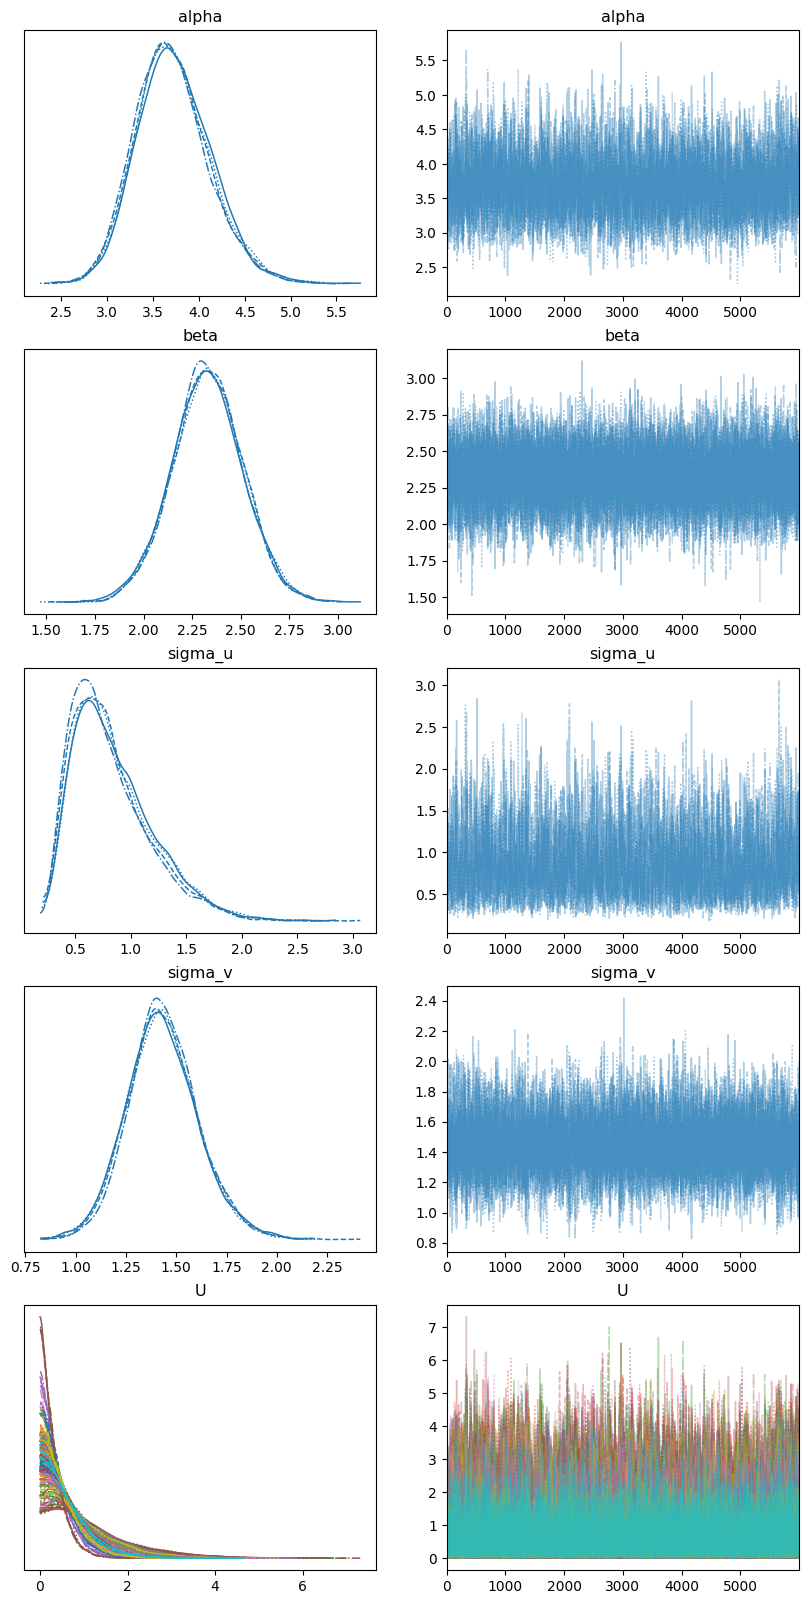

In [76]:
az.plot_trace(trace_norm[0], figsize=(10,20))
az.summary(trace_norm[0], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.89  0.34    4.27     5.53       0.01     0.01    613.84   1436.47   
beta     1.89  0.12    1.65     2.12       0.00     0.00   9830.18  15514.91   
sigma_u  0.91  0.39    0.30     1.64       0.02     0.01    466.06    999.53   
sigma_v  1.24  0.16    0.92     1.52       0.01     0.00    778.08    958.06   
U[0]     0.57  0.47    0.00     1.44       0.01     0.01   2944.60   6621.88   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.49  1.12    0.00     3.60       0.04     0.02    736.46   1546.43   
U[96]    0.90  0.71    0.00     2.22       0.02     0.01   1081.61   2945.57   
U[97]    0.56  0.47    0.00     1.41       0.01     0.01   3317.47   7838.43   
U[98]    0.63  0.51    0.00     1.58       0.01     0.01   2687.53   6507.53   
U[99]    0.60  0.50    0.00     1.51       0.01     0.01   2268.64   6572.38   

         r_hat  
alpha     1.01  
beta      1.00  
sigma_u   1.01  
sigma_v   1.01  
U[0]      1.00  
...        ...  
U[95]     1.01  
U[96]     1.01  
U[97]     1.00  
U[98]     1.00  
U[99]     1.00  

[104 rows x 9 columns]

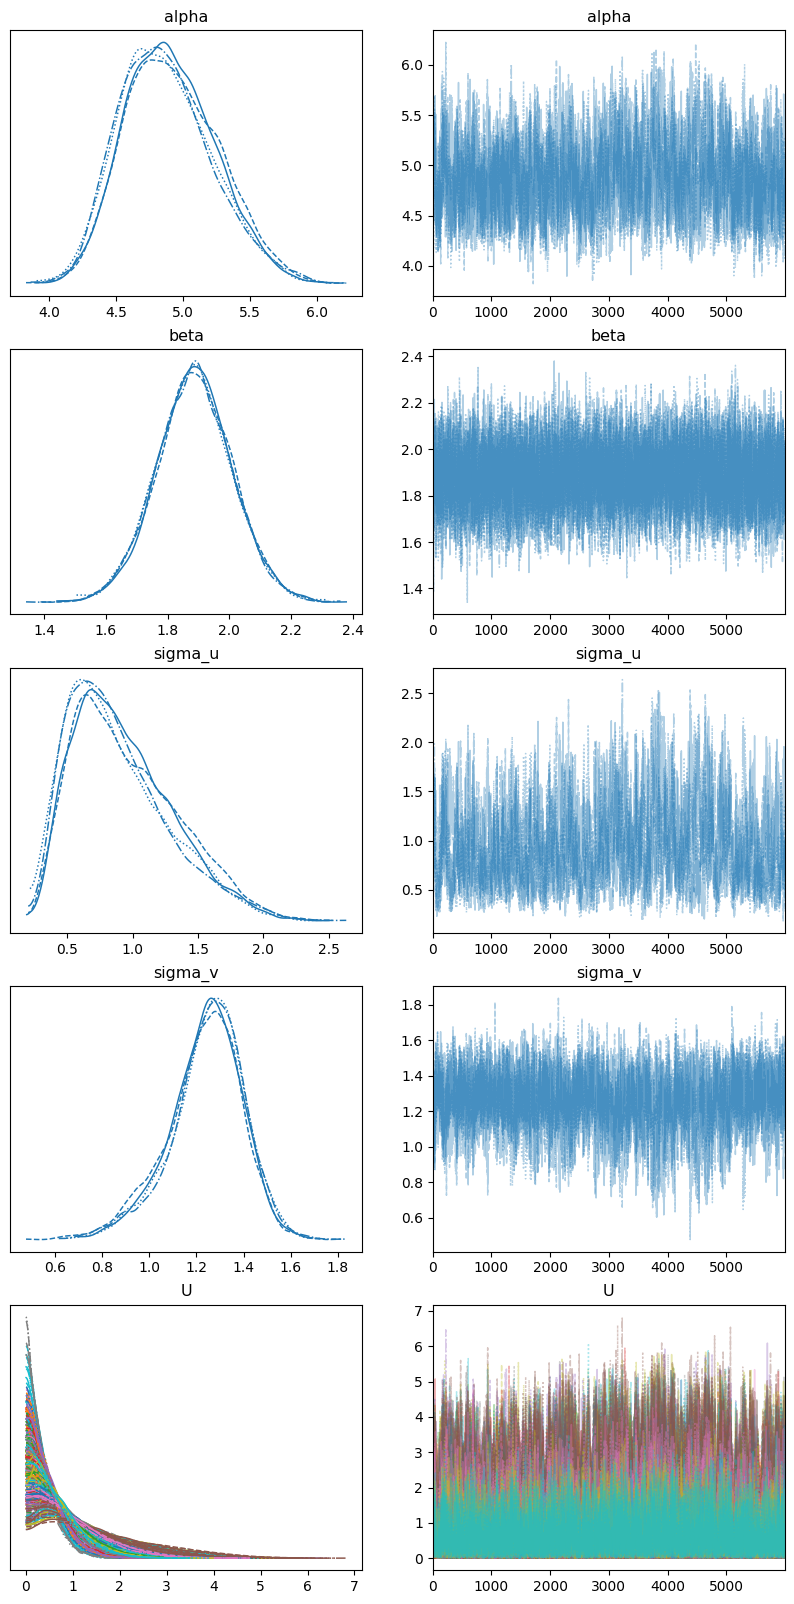

In [77]:
az.plot_trace(trace_norm[1], figsize=(10,20))
az.summary(trace_norm[1], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.51  0.36    3.87     5.18       0.02     0.01    302.54   1068.29   
beta     2.07  0.10    1.88     2.26       0.00     0.00  14639.87  16535.83   
sigma_u  1.12  0.42    0.41     1.87       0.03     0.01    261.16    823.92   
sigma_v  1.30  0.16    1.00     1.58       0.01     0.00    347.11    945.04   
U[0]     0.61  0.50    0.00     1.51       0.01     0.01   3115.41   9469.93   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[195]   0.87  0.68    0.00     2.12       0.02     0.01   1384.60   5208.64   
U[196]   0.98  0.74    0.00     2.33       0.02     0.01    966.67   3208.80   
U[197]   0.51  0.43    0.00     1.29       0.01     0.00   5878.75   8132.71   
U[198]   0.87  0.67    0.00     2.09       0.02     0.01   1101.23   4575.09   
U[199]   0.78  0.60    0.00     1.88       0.02     0.01   1538.34   6327.61   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
U[0]      1.00  
...        ...  
U[195]    1.00  
U[196]    1.00  
U[197]    1.00  
U[198]    1.00  
U[199]    1.00  

[204 rows x 9 columns]

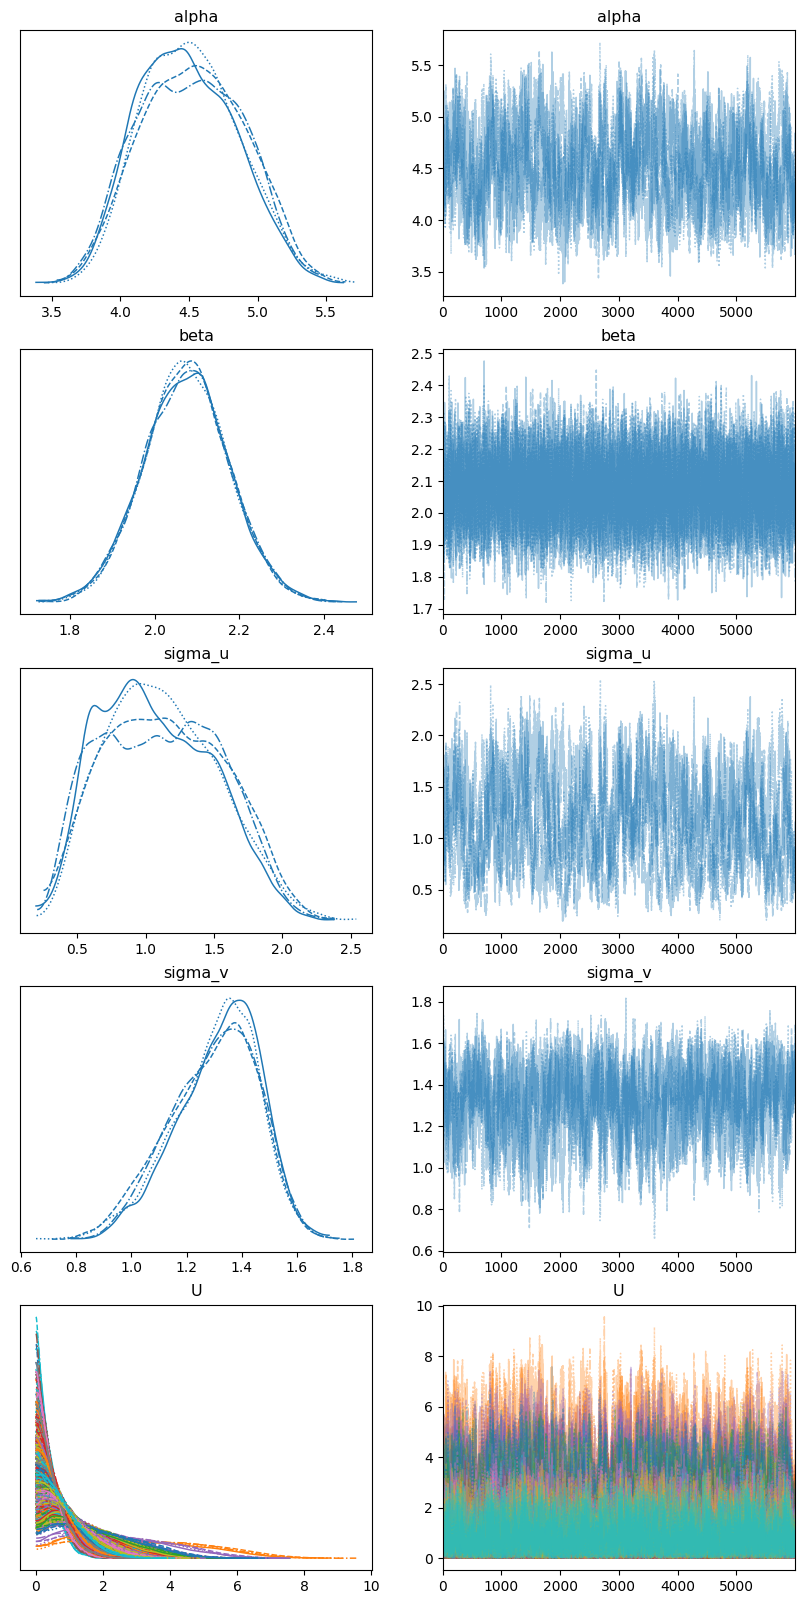

In [78]:
az.plot_trace(trace_norm[2], figsize=(10,20))
az.summary(trace_norm[2], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.51  0.24    4.08     4.95       0.01     0.00    502.30   1179.36   
beta     1.92  0.07    1.80     2.04       0.00     0.00  35464.05  18123.40   
sigma_u  0.79  0.27    0.32     1.29       0.01     0.01    442.02   1042.16   
sigma_v  1.38  0.08    1.23     1.52       0.00     0.00    724.34   1368.78   
U[0]     0.92  0.70    0.00     2.21       0.02     0.01   1231.94   3114.64   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[495]   0.45  0.38    0.00     1.15       0.01     0.00   5902.59  11221.94   
U[496]   0.53  0.44    0.00     1.33       0.01     0.01   3740.19   6650.61   
U[497]   0.52  0.43    0.00     1.31       0.01     0.01   3931.78   8058.00   
U[498]   0.83  0.64    0.00     2.00       0.02     0.01   1565.60   3664.25   
U[499]   0.73  0.59    0.00     1.80       0.01     0.01   1793.20   4340.49   

         r_hat  
alpha     1.01  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
U[0]      1.00  
...        ...  
U[495]    1.00  
U[496]    1.00  
U[497]    1.00  
U[498]    1.00  
U[499]    1.00  

[504 rows x 9 columns]

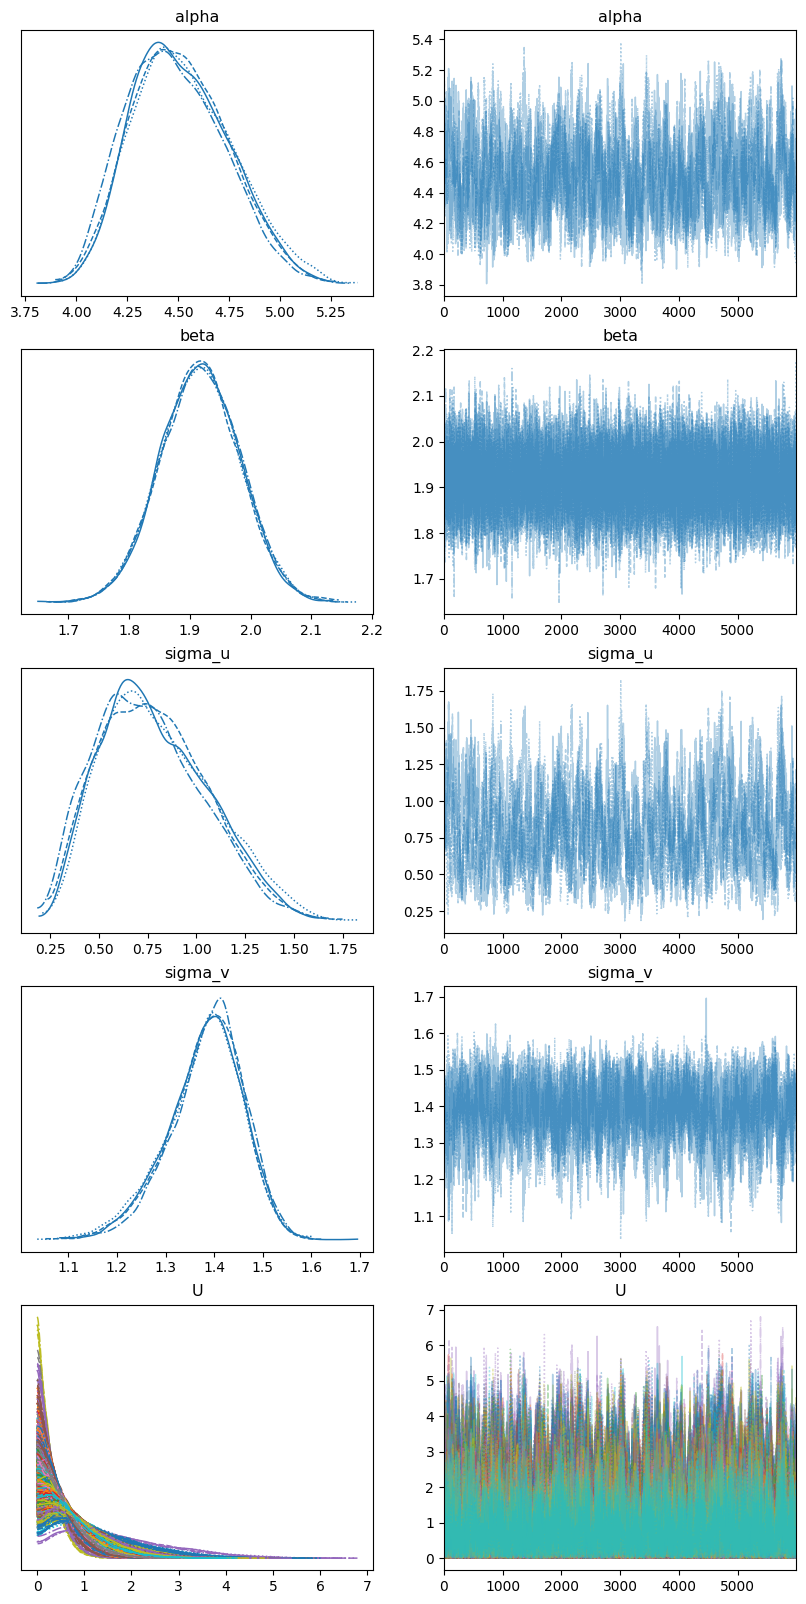

In [79]:
az.plot_trace(trace_norm[3], figsize=(10,20))
az.summary(trace_norm[3], round_to=2)

In [80]:
# Compare using LOO (preferred over WAIC in most cases)
model_comparison = az.compare(
    {"SkewNormal": trace[0], "Normal": trace_norm[0]}, method='BB-pseudo-BMA', ic='loo'
)

az.display_dataframe_to_user("Model Comparison Table", model_comparison)

# Optional: Visualize comparison
az.plot_compare(model_comparison);

TypeError: Encountered error in ELPD computation of compare.

In [81]:
# Rerun comparisons safely
cmp_df = az.compare(
    {"SkewNormal": trace[0], "Normal": trace_norm[0]},
    ic="loo",
    method="BB-pseudo-BMA",
    scale="deviance"
)

# Print the comparison
print(cmp_df)

# Plot the comparison — try passing explicitly
az.plot_compare(cmp_df, insample_dev=False)
plt.show()

TypeError: Encountered error in ELPD computation of compare.